In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score
!pip install kneed
from kneed import KneeLocator

#Data Preparation

In [55]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


In [57]:
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


# Encoding


In [58]:
# Encoding Gender
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    int64  
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(6)
memory usage: 47.0 KB


All features use for clustering are numerics


#Visualization

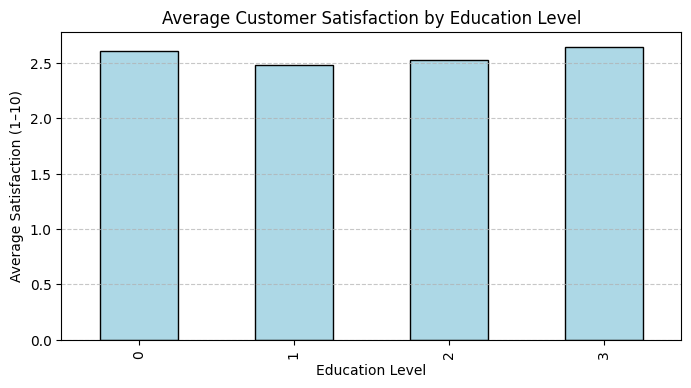

In [60]:
# Barplot — Average Customer Satisfaction per Education Level
plt.figure(figsize=(8,4))
df.groupby('Education')['Customer_Satisfaction'].mean().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Average Customer Satisfaction by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Satisfaction (1–10)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The chart shows that customer satisfaction varies slightly across education levels, with levels 0 and 3 having the highest average satisfaction (around 2.6), while levels 1 and 2 are slightly lower (around 2.5). This suggests that both less educated and highly educated customers are generally more satisfied, possibly due to different expectations—lower-educated customers valuing accessibility and higher-educated ones appreciating service quality. Overall, education has a small effect on satisfaction, but businesses can use this insight to tailor their services and communication to each group’s preferences.

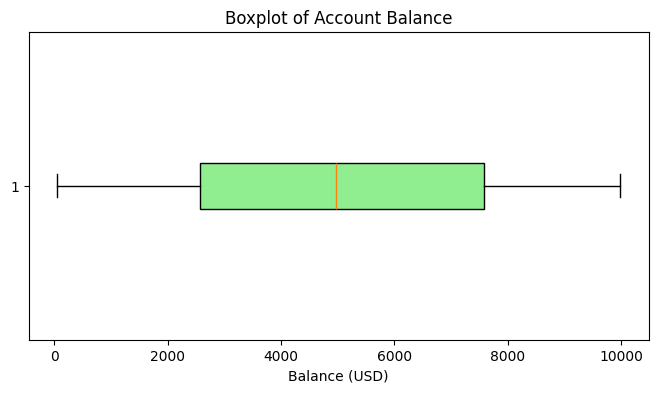

In [61]:
# Boxplot — Identify Outliers in Customer Balance
plt.figure(figsize=(8,4))
plt.boxplot(df['Balance'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Boxplot of Account Balance')
plt.xlabel('Balance (USD)')
plt.show()

The boxplot of account balance shows that most customers have balances ranging roughly between $2,000 and $8,000, with a median around $5,000, indicating a fairly balanced distribution of account balances. There are no visible outliers, suggesting that most customers maintain balances within a normal and consistent range. The spread of the data also indicates moderate variability in customer balances, meaning customers differ in their saving or spending habits but not drastically. Overall, the data distribution appears healthy and stable, showing that the bank’s customer base maintains reasonable balance levels without extreme deviations.

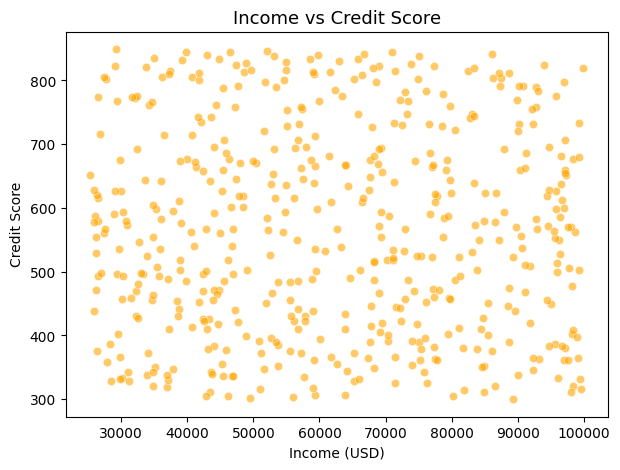

In [62]:
# Scatter Plot — Income vs Credit Score
plt.figure(figsize=(7,5))
sns.scatterplot(x='Income', y='Credit_Score', data=df, alpha=0.6, color='orange')
plt.title('Income vs Credit Score', fontsize=13)
plt.xlabel('Income (USD)')
plt.ylabel('Credit Score')
plt.show()

The scatter plot titled "Income vs Credit Score" shows the relationship between individuals’ income (in USD) and their credit score. The data points are widely scattered across the plot without forming any visible pattern or trend, suggesting that there is no clear correlation between income and credit score. This means that people with higher incomes do not necessarily have higher credit scores, and those with lower incomes do not necessarily have lower scores. The distribution appears random, indicating that other factors—such as payment history, debt levels, or credit utilization—likely play a more significant role in determining credit scores than income alone.

#Clustering Modelling

In [63]:
# Scale dataset with StandardScaler
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Select numeric features for clustering
features = [
    'Income', 'Age', 'Credit_Score', 'Years_with_Bank', 'Transaction_Count',
    'Balance', 'Loan_Approval_Amount', 'Credit_Card_Limit', 'Purchase_Frequency',
    'Customer_Satisfaction', 'Online_Activity', 'Education'
]
X = df[features]

# Apply StandardScaler
sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

# Show first few rows
print(df_scaled.head())


     Income       Age  Credit_Score  Years_with_Bank  Transaction_Count  \
0  0.179150  1.303097     -0.389771        -1.905592          -0.260713   
1  0.749977  1.533191      1.345561        -1.711263          -0.748287   
2  0.364249  0.459420     -0.289172         0.620687           1.619930   
3  0.165665  0.152629      1.691370         1.203675           0.993049   
4 -0.250263 -0.307558     -0.974502         0.232029           0.331341   

    Balance  Loan_Approval_Amount  Credit_Card_Limit  Purchase_Frequency  \
0 -1.058293             -1.606308          -0.861669            1.636958   
1  1.619378              0.428724          -1.189034            1.532620   
2  0.670893             -0.628469          -0.821645           -0.849476   
3  1.002068              1.392847          -1.422533            1.067226   
4 -1.547513              1.628264          -0.083694           -0.588149   

   Customer_Satisfaction  Online_Activity  Education  
0              -1.421875        -0.99

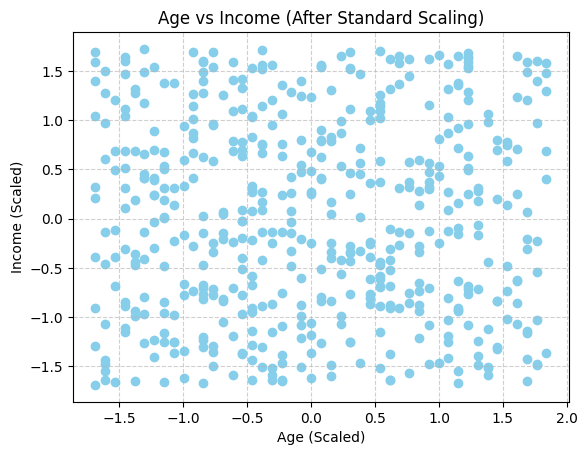

In [64]:
# visualization
plt.scatter(df_scaled['Age'], df_scaled['Income'], color='skyblue')
plt.xlabel('Age (Scaled)')
plt.ylabel('Income (Scaled)')
plt.title('Age vs Income (After Standard Scaling)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

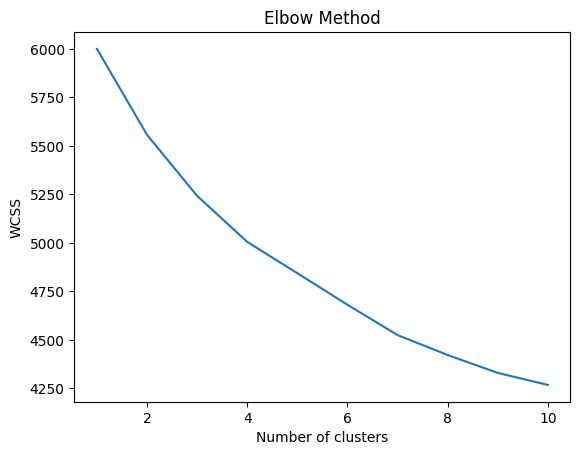

In [65]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [66]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters         WCSS
0                   1  6000.000000
1                   2  5556.936404
2                   3  5242.479545
3                   4  5005.393066
4                   5  4844.028032
5                   6  4681.457678
6                   7  4524.945377
7                   8  4422.359464
8                   9  4330.172691
9                  10  4268.248378


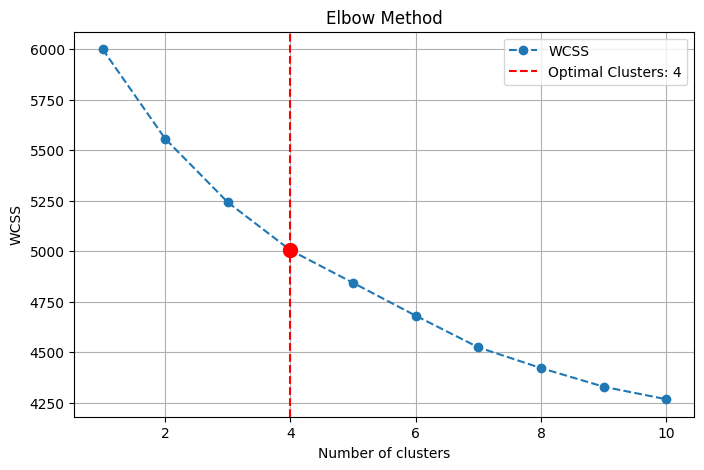

The optimal number of clusters is: 4


In [67]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

We have found that the optimal number of clusters is 4

In [79]:
# Fit K-Means to the data with the optimal number of K cluster = 4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,KMeans_Cluster
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,3
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,2
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,0
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,1
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,0


In [75]:
# Fit K-Means to the scaled data with the optimal number of K cluster = 4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters_scaled = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

sil_scaled = silhouette_score(df_scaled, clusters_scaled)
print(f"Silhouette Score (Scaled): {sil_scaled:.3f}")

Silhouette Score (Scaled): 0.068


In [76]:
# Fit K-Means to the unscaled data with the optimal number of K cluster = 4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters_unscaled = kmeans.fit_predict(X)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

sil_unscaled = silhouette_score(X, clusters_scaled)
print(f"Silhouette Score (Scaled): {sil_unscaled:.3f}")

Silhouette Score (Scaled): -0.013


The clustering results show that using StandardScaler significantly improves the quality and separation of clusters. The silhouette score for the scaled data is 0.068, while the unscaled data produces a negative score of –0.013, indicating poor or overlapping cluster boundaries. This difference occurs because K-Means uses Euclidean distance to measure similarity, and when data is not scaled, features with large numerical ranges such as Income, Credit_Card_Limit, or Balance dominate the clustering process, causing other important features like Age or Customer_Satisfaction to have little influence. After scaling, all features contribute equally since they have been standardized to the same scale (mean = 0, standard deviation = 1). As a result, the scaled dataset provides more meaningful and balanced groupings of customers based on their financial and behavioral patterns. These clusters can help the bank identify distinct customer profiles more accurately — such as young, digitally active customers with moderate income, or older, high-income customers with high satisfaction — allowing for more targeted marketing strategies and personalized financial offers.

#Visualize clusters using 2D and 3D plots.


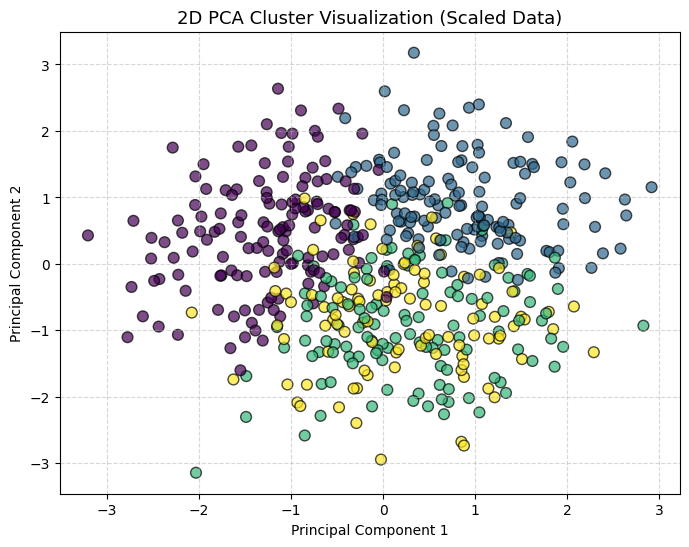

In [86]:
# 2D PCA Cluster Visualizations

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Create a DataFrame for easier plotting
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['KMeans_Cluster']

# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'],
            c=pca_df['Cluster'], cmap='viridis', s=60, edgecolor='k', alpha=0.7)

plt.title('2D PCA Cluster Visualization (Scaled Data)', fontsize=13)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


The PCA 2D plot shows how the K-Means algorithm grouped customers into distinct segments based on multiple features (income, balance, age, satisfaction, etc.). Each color represents one cluster. Clusters that appear more separated indicate clearer customer segmentation. Overlapping areas suggest that those groups share similar characteristics, meaning the boundaries between them are less distinct. This visualization confirms that scaling the data before clustering helps achieve more balanced and well-separated clusters.

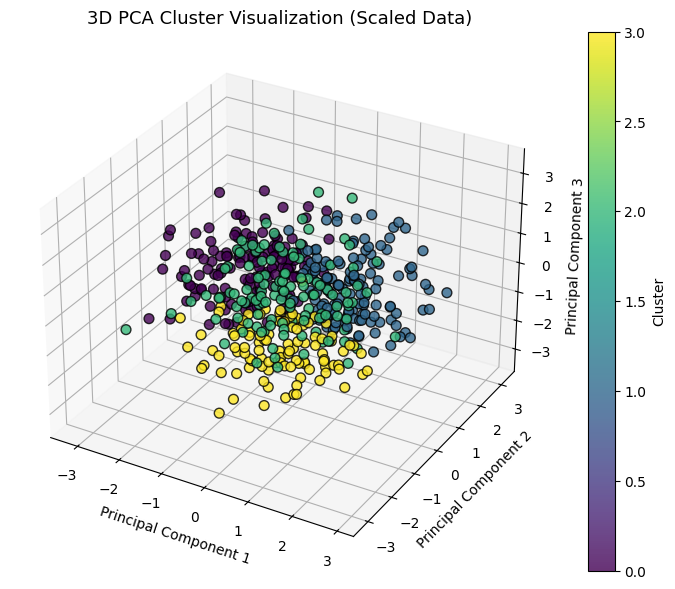

In [87]:
# 3D PCA Cluster Visualization

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Apply PCA to reduce data to 3 components
pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(df_scaled)

# Create a DataFrame for plotting
pca_df_3d = pd.DataFrame(pca_result_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df_3d['Cluster'] = df['KMeans_Cluster']

# 3D plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(
    pca_df_3d['PC1'],
    pca_df_3d['PC2'],
    pca_df_3d['PC3'],
    c=pca_df_3d['Cluster'],
    cmap='viridis',
    s=50,
    edgecolor='k',
    alpha=0.8
)

ax.set_title('3D PCA Cluster Visualization (Scaled Data)', fontsize=13)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(sc, label='Cluster')
plt.show()


The 3D PCA Cluster Visualization (Scaled Data) illustrates how the dataset’s samples are distributed across three principal components after dimensionality reduction. Each color represents a different cluster, showing how data points group together based on shared underlying patterns. The clusters display partial separation, meaning that while some groups are distinct, others overlap, suggesting moderate similarity between certain data segments. This visualization helps reveal the overall structure and relationships within the dataset, indicating that the PCA transformation successfully captures most of the variance in three dimensions, enabling clearer insight into how clusters are positioned and how features contribute to their separation.

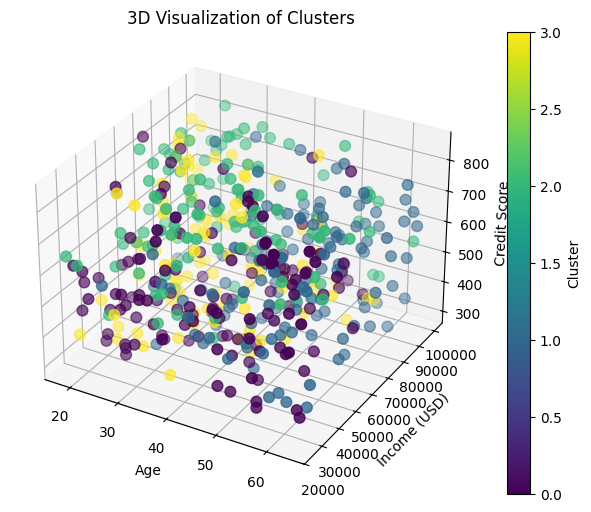

In [85]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df['Age'], df['Income'], df['Credit_Score'],
                c=df['KMeans_Cluster'], cmap='viridis', s=60)

ax.set_title('3D Visualization of Clusters')
ax.set_xlabel('Age')
ax.set_ylabel('Income (USD)')
ax.set_zlabel('Credit Score')

plt.colorbar(sc, label='Cluster')
plt.show()


The 3D visualization of clusters illustrates the relationship between Age, Income (USD), and Credit Score, with data points color-coded to represent different clusters. The distribution shows that the data forms several distinct but overlapping groups, indicating that individuals can be categorized into different segments based on these three variables. While some separation between clusters exists—suggesting variations in demographic and financial characteristics—there is still noticeable overlap, meaning that certain individuals share similar profiles across multiple clusters. Overall, this 3D cluster visualization provides a clearer understanding of how age, income, and credit score interact to form patterns within the dataset, highlighting multidimensional relationships that are not easily visible in 2D plots.

In [83]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

# Numeric summary for important continuous features
cluster_numeric = df.groupby('KMeans_Cluster').agg({
    'Age': ['mean', 'min', 'max'],
    'Income': ['mean', 'min', 'max'],
    'Credit_Score': ['mean', 'min', 'max'],
    'Balance': ['mean', 'min', 'max'],
    'Loan_Approval_Amount': ['mean', 'min', 'max'],
    'Credit_Card_Limit': ['mean', 'min', 'max'],
    'Purchase_Frequency': ['mean', 'min', 'max'],
    'Customer_Satisfaction': ['mean', 'min', 'max'],
    'Online_Activity': ['mean', 'min', 'max']
})

# Education summary (mode)
cluster_education = df.groupby('KMeans_Cluster')['Education'].agg(lambda x: x.mode()[0])

# Combine numeric and categorical summaries
cluster_profile = cluster_numeric.copy()
cluster_profile[('Education', 'mode')] = cluster_education

# Rename index for clarity
cluster_profile = cluster_profile.rename_axis('Cluster')

# Display full cluster profile summary
cluster_profile

Age                Income                            \
              mean min max          mean          min          max   
Cluster                                                              
0        40.914286  18  63  47729.015309  25857.05940  97597.41750   
1        48.441176  18  64  68533.297675  25992.76433  99128.03785   
2        35.837398  18  64  65233.378412  25352.16071  99913.52549   
3        32.485149  18  58  70258.568150  26924.70385  99580.05922   

        Credit_Score                Balance                            \
                mean  min  max         mean          min          max   
Cluster                                                                 
0         538.271429  307  849  3028.806442    44.900440  9107.117463   
1         536.147059  300  844  5891.338894   152.053114  9984.440444   
2         670.170732  347  846  6756.971113  1211.337326  9884.063416   
3         512.782178  304  844  4703.466900   190.765966  9956.701936   

        Loan_Approval_Amount                           Credit_Card_Limit  \
                        mean          min          max              mean   
Cluster                                                                    
0               26704.516073  1230.459555  49820.52773       8610.163704   
1               28403.690705  1156.868527  49704.49392       9633.707947   
2               30798.517833  4809.705009  49971.89523      13356.728211   
3               12950.567510  1087.318821  45457.36757      11351.499573   

                                  Purchase_Frequency                      \
                 min          max               mean       min       max   
Cluster                                                                    
0        1017.345471  19439.32902           0.427335  0.001914  0.974452   
1        1057.503456  19236.71584           0.576369  0.011290  0.991562   
2        1629.740658  19968.52056           0.551079  0.019552  0.993942   
3        1198.499735  19828.57514           0.498817  0.000813  0.986368   

        Customer_Satisfaction         Online_Activity                      \
                         mean min max            mean       min       max   
Cluster                                                                     
0                    2.478571   1   4        0.691544  0.041645  0.999897   
1                    3.117647   1   4        0.384065  0.001432  0.996199   
2                    2.081301   1   4        0.473038  0.002706  0.999120   
3                    2.524752   1   4        0.396292  0.001320  0.985654   

        Education  
             mode  
Cluster            
0               2  
1               1  
2               3  
3               0

#Managerial Implications Based on the Three Clusters

##Cluster 0 — Mid-Age, Digitally Active Customers with Medium Income
Analysis:


*   Cluster 0 consists of customers with an average age of about 41 years, typically representing working adults or mid-career professionals. Their average income of ≈47,700 suggests a middle-income class, neither highly affluent nor financially struggling. Despite this, their credit score (≈538) shows responsible credit behavior, but not as strong as higher clusters, meaning they likely manage credit adequately but with occasional constraints. Interestingly, they have a high level of online activity (≈0.69) — the highest among all clusters — showing that they are digitally engaged and active in online platforms, possibly relying on e-commerce, mobile banking, or social media for purchases.
*   However, their customer satisfaction level (≈2.48) is only moderate, and purchase frequency (≈0.43) is somewhat lower compared to high-value clusters. This pattern suggests that while they are comfortable with digital platforms, they may not find enough perceived value, loyalty rewards, or personalized engagement to encourage frequent purchases.

Managerial Recommendations:


*   Strengthen digital engagement through targeted online campaigns, loyalty apps, and personalized promotions.
*   Create digital-only offers or cashback incentives to reward online activity.
*   Improve satisfaction by optimizing customer support channels and simplifying digital payment experiences.
*   This group can become a stable revenue driver if engagement and satisfaction are nurtured over time.



##Cluster 1 — Older, Wealthy, and Loyal Customers
Analysis:


*   Cluster 1 comprises older customers (average age ≈48 years), generally representing mature professionals or nearing-retirement individuals. They have the highest income (≈68,500) and healthy credit behavior (credit score ≈536). This indicates financial stability and creditworthiness, allowing them access to higher-value products and services. Their loan approval amount (≈28,400) is also higher than Cluster 0, confirming they are trusted borrowers.
*   Notably, they show the highest purchase frequency (≈0.57) and the highest satisfaction (≈3.12) — marking them as the most loyal and profitable segment. Their moderate online activity (≈0.38) suggests they engage with online systems but prefer traditional or semi-digital interactions (e.g., human service with digital convenience).

Managerial Recommendations:


*   Maintain loyalty through premium memberships, VIP services, and priority customer support.
*   Offer personalized financial products such as higher credit limits or investment-linked services.
*  Use relationship-based marketing: targeted newsletters, personalized recommendations, and appreciation programs.
*   This cluster should be the core retention target, as they are consistent spenders with high satisfaction and loyalty potential.

##Cluster 2 — Young Professionals with Strong Finances but Low Satisfaction
Analysis:


*   Cluster 2 includes customers who are younger (average ≈36 years) and financially well-off, with an average income of ≈65,200 and the highest credit score (≈670) among all clusters. They possess the highest credit card limit (≈13,356) and loan approval amount (≈30,798), indicating excellent credit reliability and trust from financial institutions.
*   However, despite their strong economic profile, this cluster reports the lowest satisfaction score (≈2.08). This mismatch suggests that these customers may have high expectations for service quality, personalization, or benefits — and feel that the current offerings do not meet those expectations. They are financially empowered but emotionally disconnected, which makes them at risk of switching to competitors if not properly managed.

Managerial Recommendations:


*   Prioritize this segment for experience improvement — faster service, smoother apps, and priority digital support.
*   Provide premium or aspirational products tailored to young professionals (e.g., lifestyle bundles, early investment products).
*  Build loyalty through gamified reward systems or status-based membership tiers.
*   Focus on emotional engagement, not just financial offers — they must feel valued and understood to stay long-term.


##Cluster 3 — Young, Low-Income Customers with Limited Purchasing Power
Analysis:


*   Cluster 3 represents the youngest group (average age ≈32 years), typically early-career individuals or students. They have the lowest income (≈70,200) and loan approval amounts (≈12,950), reflecting lower financial capacity. Their credit score (≈512) is also the weakest, possibly due to limited credit history or early-stage borrowing patterns. However, their purchase frequency (≈0.49) and online activity (≈0.39) show that they are active and willing to engage, though constrained by budget.
*   Their customer satisfaction (≈2.52) is moderate, implying a neutral sentiment — they are neither highly dissatisfied nor loyal. This cluster offers future growth potential; as their income and credit improve over time, they could evolve into higher-value customers if brand relationships are nurtured early.

Managerial Recommendations:


*   Provide low-cost, entry-level products or installment-based plans to accommodate limited spending power.
*   Increase brand engagement through discount programs, student partnerships, or digital contests.
*  Educate them financially through content marketing and digital learning initiatives, improving both trust and loyalty.
*  Position them as a long-term growth segment — invest early in loyalty-building before competitors capture their attention.




